Working On DR. SEMMELWEIS AND THE DISCOVERY OF HANDWASHING

In [2]:
## import the dataset
import pandas as pd
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')

In [3]:
## have a look at the dataset
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [4]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
year      12 non-null int64
births    12 non-null int64
deaths    12 non-null int64
clinic    12 non-null object
dtypes: int64(3), object(1)
memory usage: 464.0+ bytes


In [5]:
yearly.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [6]:
## in which year we have maximum number of deaths 
## and number of births in that year
max_deaths = yearly.deaths.max()
yearly[yearly.deaths == max_deaths]

,year,births,deaths,clinic
1,1842,3287,518,clinic 1


In [7]:
## in which year we have minimum number of deaths
## and the number of births in that year
min_deaths = yearly.deaths.min()
yearly[yearly.deaths == min_deaths]

,year,births,deaths,clinic
10,1845,3241,66,clinic 2


In [8]:
## in which year we have minimum  and maximum number of deaths
## in clinic 1 and clinic 2 seperately
yearly_new_index =yearly.set_index(['clinic', 'year'])
yearly_new_index

births  deaths
clinic   year                
clinic 1 1841    3036     237
         1842    3287     518
         1843    3060     274
         1844    3157     260
         1845    3492     241
         1846    4010     459
clinic 2 1841    2442      86
         1842    2659     202
         1843    2739     164
         1844    2956      68
         1845    3241      66
         1846    3754     105

In [9]:
## clinic 1 dataset
clinic1 = yearly_new_index.loc['clinic 1']
clinic1

,births,deaths
year,,
1841,3036,237
1842,3287,518
1843,3060,274
1844,3157,260
1845,3492,241
1846,4010,459


In [10]:
## year in which we have maximum number of deaths in clinic 1
## also number of births in that year
clinic1_max_deaths = clinic1.deaths.max()
clinic1[clinic1.deaths == clinic1_max_deaths]

,births,deaths
year,,
1842,3287,518


In [11]:
## year in which we have minimum number of deaths in clinic 1
## also number of births in that year
clinic1_min_deaths = clinic1.deaths.min()
clinic1[clinic1.deaths == clinic1_min_deaths]

,births,deaths
year,,
1841,3036,237


In [12]:
## clinic 2 dataset
clinic2 =  yearly_new_index.loc['clinic 2']
clinic2

,births,deaths
year,,
1841,2442,86
1842,2659,202
1843,2739,164
1844,2956,68
1845,3241,66
1846,3754,105


In [13]:
## year in which we have maximum number of deaths in clinic 2
## also number of births in that year
clinic2_max_deaths = clinic2.deaths.max()
clinic2[clinic2.deaths == clinic2_max_deaths]

,births,deaths
year,,
1842,2659,202


In [14]:
## year in which we have minimum number of deaths in clinic 1
## also number of births in that year
clinic2_min_deaths = clinic2.deaths.min()
clinic2[clinic2.deaths == clinic2_min_deaths]

,births,deaths
year,,
1845,3241,66


In [16]:
## we look at the proportion of deaths out of the number of women giving birth
yearly['proportion_deaths'] = yearly.deaths/yearly.births
yearly

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [18]:
# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly.clinic == 'clinic 1']
yearly2 = yearly[yearly.clinic == 'clinic 2']
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [19]:
yearly2

,year,births,deaths,clinic,proportion_deaths
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


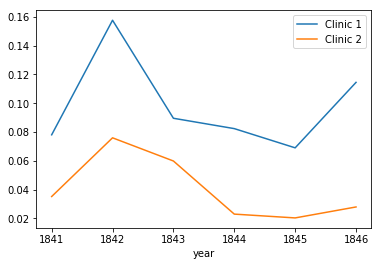

In [22]:
# Plot yearly proportion of deaths at the two clinics
%matplotlib inline
ax = yearly1.plot(x = 'year', y = 'proportion_deaths', label = 'Clinic 1')
yearly2.plot(x = 'year', y = 'proportion_deaths', label = 'Clinic 2', ax=ax)

In [30]:
## proportion of deaths constantly so much higher in Clinic 1
## load in monthly data from Clinic 1 to see if the handwashing had any effect.
monthly = pd.read_csv('monthly_deaths.csv', parse_dates=["date"])
# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly.deaths/monthly.births
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [31]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
date                 98 non-null datetime64[ns]
births               98 non-null int64
deaths               98 non-null int64
proportion_deaths    98 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 KB


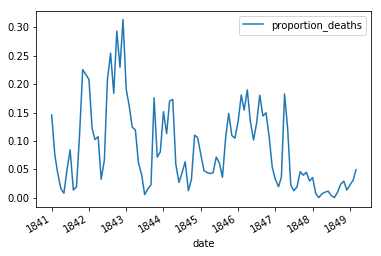

In [32]:
ax = monthly.plot(x = 'date', y = 'proportion_deaths')
ax.set_label("Proportion deaths")

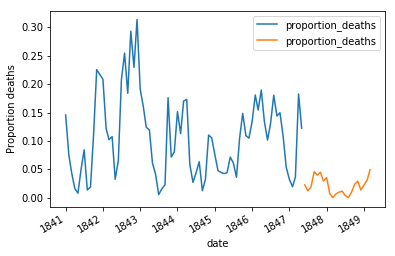

In [36]:
## Starting from the summer of 1847 the proportion of deaths is drastically reduced
handwashing_start = pd.to_datetime('1847-06-01')
#Split monthly into before and after handwashing_start
before_washing = monthly[monthly.date < handwashing_start]
after_washing = monthly[monthly.date >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths')
after_washing.plot(x='date', y='proportion_deaths', ax=ax)
ax.set_ylabel("Proportion deaths");

In [39]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

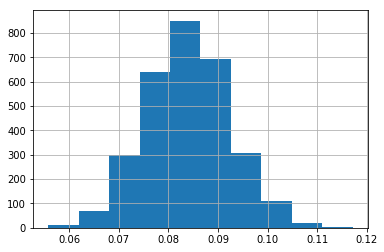

In [40]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace =True)
    boot_after = after_proportion.sample(frac=1, replace = True)
    boot_mean_diff.append( boot_before.mean()-boot_after.mean() )
    
pd.Series(boot_mean_diff).hist()

In [41]:
# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.067452
0.975    0.100853
dtype: float64

Result : So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval.